### Business Introduction
This company is a renowned video game Developer and Re-Saler, offering a diverse 
catalog of games and accessories. Known for its innovative gaming experiences, the company 
has won multiple industry awards. Its unique selling proposition lies in its customer-centric 
approach, ensuring high-quality products and engaging marketing campaigns. With a strong 
online presence, the company has established itself as a leader in the competitive gaming 
market

### Business Problem

 The company faces difficulty in aligning its inventory with fluctuating customer demand. An overestimation of 
demand results in excessive inventory holding costs, while underestimation leads to lost sales opportunities 
and dissatisfied customers.
 Specific Obstacles:

 1. Seasonal Demand: Sales spikes during holidays and game releases.
 2. Market Competition: Rapid shifts in customer preferences due to competing products.
 3. Inventory Costs: High storage costs and potential write-offs for unsold inventory.
 4. Uncertainty: Variability in customer behavior and external factors (e.g., economic conditions)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Monthly_sales.csv')
data2 = data.copy()

In [3]:
data.head()

,Month,Monthly Sales,Year,MonthNum,Quarter,DayOfWeek,Holiday,Promotion
0,01/01/2002,109271,2002,1,1,1,1,0
1,01/02/2002,98419,2002,2,1,4,0,0
2,01/03/2002,64310,2002,3,1,4,0,0
3,01/04/2002,127263,2002,4,2,0,0,0
4,01/05/2002,88443,2002,5,2,2,0,0


In [4]:
# Rename 'Month' column to 'Date'
data.rename(columns={'Month': 'Date'}, inplace=True)

### Understanding the shape of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           264 non-null    object
 1   Monthly Sales  264 non-null    int64 
 2   Year           264 non-null    int64 
 3   MonthNum       264 non-null    int64 
 4   Quarter        264 non-null    int64 
 5   DayOfWeek      264 non-null    int64 
 6   Holiday        264 non-null    int64 
 7   Promotion      264 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 16.6+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,Monthly Sales,Year,MonthNum,Quarter,DayOfWeek,Holiday,Promotion
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,112264.382576,2012.500000,6.500000,2.500000,3.011364,0.166667,0.204545
std,34751.217197,6.356339,3.458609,1.120158,1.995209,0.373386,0.404135
min,18565.000000,2002.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,88115.500000,2007.000000,3.750000,1.750000,1.000000,0.000000,0.000000
50%,112962.000000,2012.500000,6.500000,2.500000,3.000000,0.000000,0.000000
75%,133645.250000,2018.000000,9.250000,3.250000,5.000000,0.000000,0.000000
max,199736.000000,2023.000000,12.000000,4.000000,6.000000,1.000000,1.000000


* Total Observations: 264 rows (likely representing 264 months of data).
* Time Period: The data spans from January 2002 to December 2023 based on the date columns provided.
* Primary Variable: "Monthly Sales" – represents sales figures for each month.
* Temporal Features: Year, Month Number, Quarter, Day of the Week.
* Event-Based Features: Holiday indicator, Promotion indicator.
*  The average day of the week associated with the sales data (0 = Sunday, 6 = Saturday).    

In [8]:
# Convert 'Month' column to datetime format (if it's not already)
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           264 non-null    datetime64[ns]
 1   Monthly Sales  264 non-null    int64         
 2   Year           264 non-null    int64         
 3   MonthNum       264 non-null    int64         
 4   Quarter        264 non-null    int64         
 5   DayOfWeek      264 non-null    int64         
 6   Holiday        264 non-null    int64         
 7   Promotion      264 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 16.6 KB


### Checking for missing values

In [10]:
data.isnull().sum() # check for null values

Date             0
Monthly Sales    0
Year             0
MonthNum         0
Quarter          0
DayOfWeek        0
Holiday          0
Promotion        0
dtype: int64

### EDA

In [11]:
data.head()

,Date,Monthly Sales,Year,MonthNum,Quarter,DayOfWeek,Holiday,Promotion
0,2002-01-01,109271,2002,1,1,1,1,0
1,2002-02-01,98419,2002,2,1,4,0,0
2,2002-03-01,64310,2002,3,1,4,0,0
3,2002-04-01,127263,2002,4,2,0,0,0
4,2002-05-01,88443,2002,5,2,2,0,0


### Univariate Analysis

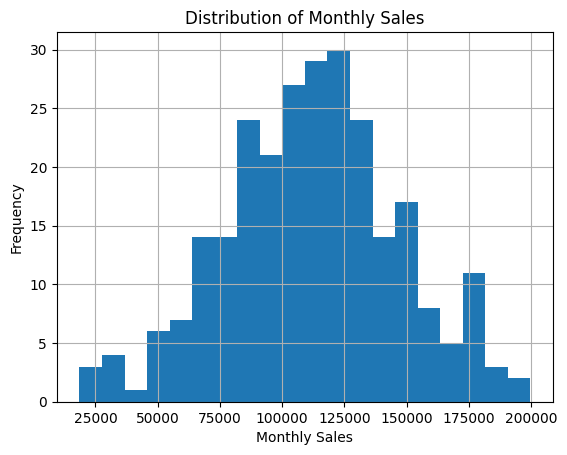

In [12]:
data['Monthly Sales'].hist(bins=20)
plt.title('Distribution of Monthly Sales')
plt.xlabel('Monthly Sales')
plt.ylabel('Frequency')
plt.show()

### Distribution Shape: 
- The histogram appears to have a right-skewed distribution, with the majority of monthly sales falling between 50,000 and 150,000. There are fewer occurrences of very low or very high sales amounts.
- Range of Sales: The sales range from around 25,000 to just under 200,000.
- Peak of Distribution: The highest frequency of sales occurs between 100,000 and 125,000.

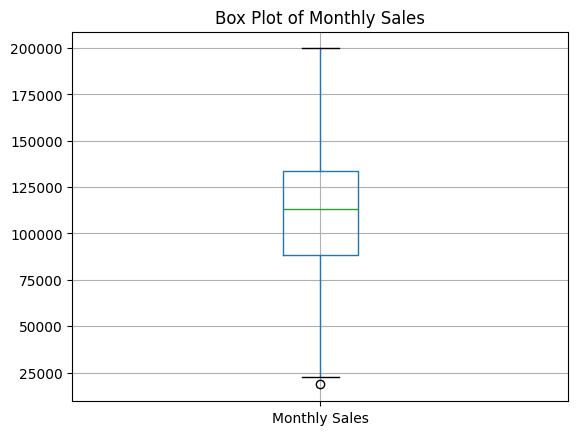

In [13]:
data.boxplot(column='Monthly Sales')
plt.title('Box Plot of Monthly Sales')
plt.show()

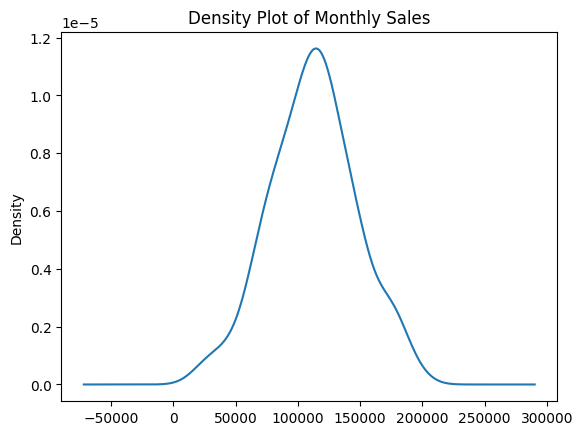

In [14]:
data['Monthly Sales'].plot(kind='kde')
plt.title('Density Plot of Monthly Sales')
plt.show()

### Insights
- The plot shows a bell-shaped curve, which is characteristic of a normal distribution.This suggests that most of the monthly sales fall around a central value with fewer sales at the extremes.
- Peak of Distribution: The highest point of the curve represents the mode, or the most common sales amount, which appears to be around 100,000.

## Bivariate Analysis

### 1. Sales Trends and Pattern

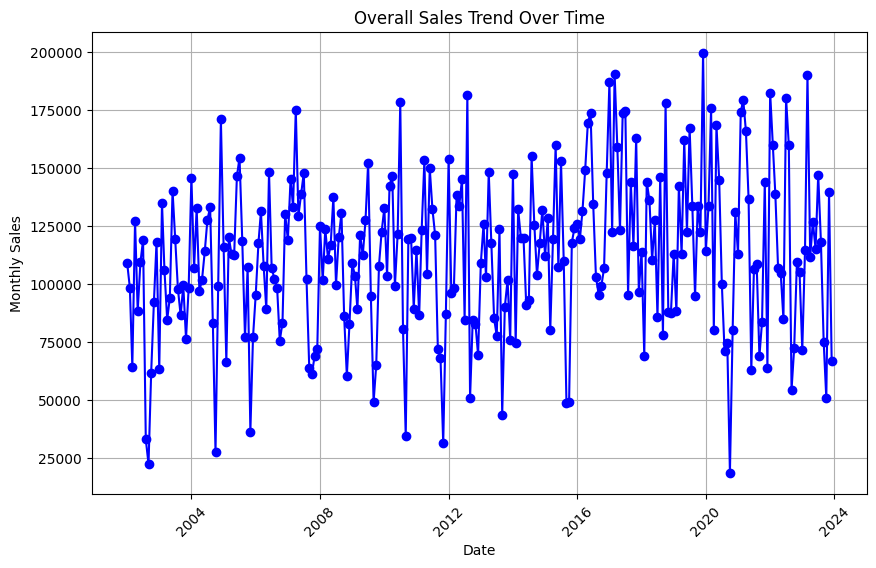

In [15]:
# Plotting the sales over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Monthly Sales'], marker='o', linestyle='-', color='b')
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

###  Sales Over Time
- Trend: The overall trend appears to be increasing, suggesting that sales have generally grown over the years.
- Fluctuations: There is significant variability in monthly sales, with frequent peaks and drops.
- Seasonality: The pattern of spikes and dips suggests potential seasonal trends or cyclical variations in sales.
- Outliers: Some months show extreme highs or lows, indicating unusual events affecting sales (e.g., promotions, economic downturns).
- Recent Years (Post-2015): Sales appear to stabilize at a higher range compared to earlier years, though fluctuations still exist.

In [16]:
print(data.columns)

Index(['Date', 'Monthly Sales', 'Year', 'MonthNum', 'Quarter', 'DayOfWeek',
       'Holiday', 'Promotion'],
      dtype='object')


### 2. Seasonal patterns in sales

To identify seasonal patterns in sales, we can use:

* Autocorrelation Plot (ACF & PACF) → Checks if past sales influence future sales.
* Seasonal Decomposition → Splits the time series into trend, seasonality, and residuals.
* Seasonal Subseries Plot → Helps visualize how sales behave across seasons (e.g., months or weeks).

### Step 1 Seasonal Decomposition

In [17]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\kaoth\new_amazon\Scripts\python.exe -m pip install --upgrade pip


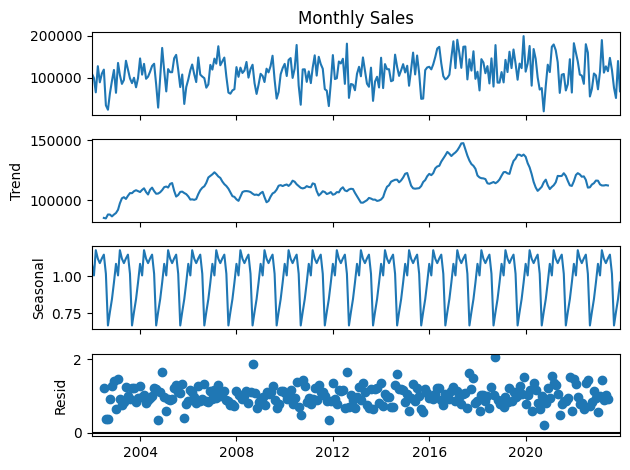

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'Date' as index and perform time series decomposition
data.set_index('Date', inplace=True)

# Perform decomposition, assuming monthly data, and set period=12 for monthly seasonality
result = seasonal_decompose(data['Monthly Sales'], model='multiplicative', period=12)
result.plot()
plt.show()

This image represents a time series decomposition of monthly sales into its observed, trend, seasonal, and residual components.
- Sales have a clear increasing trend until 2016, followed by stabilization or slight decline.
- Seasonal variations are strong, meaning businesses should plan for cyclic demand fluctuations.
- Residuals appear random, indicating that most predictable patterns have been captured

### Step 2: Plot Autocorrelation & Partial Autocorrelation

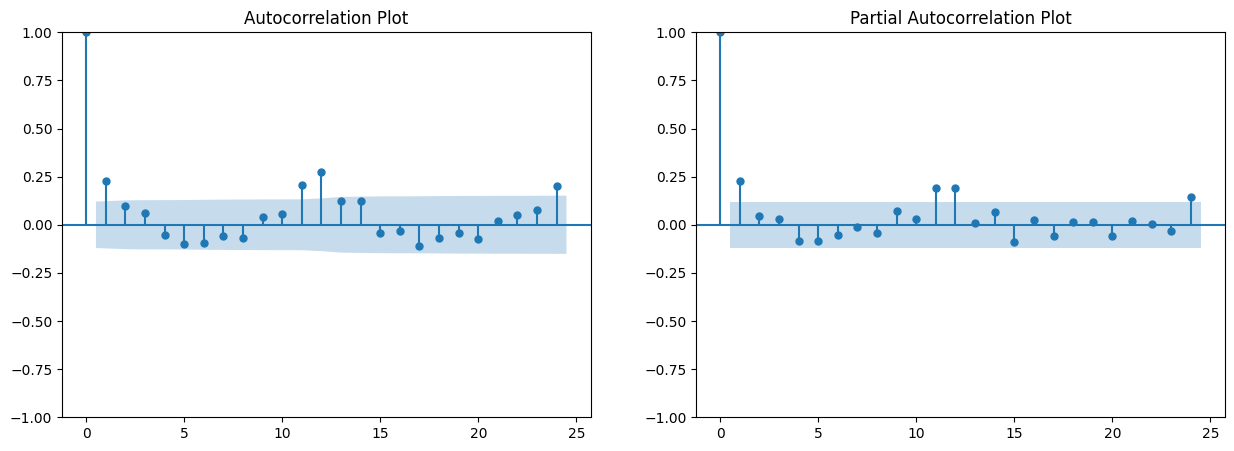

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(data["Monthly Sales"], lags=24, ax=axes[0])  # Autocorrelation
axes[0].set_title("Autocorrelation Plot")

plot_pacf(data["Monthly Sales"], lags=24, ax=axes[1])  # Partial Autocorrelation
axes[1].set_title("Partial Autocorrelation Plot")

plt.show()


### Step 3 Seasonal subseries plot

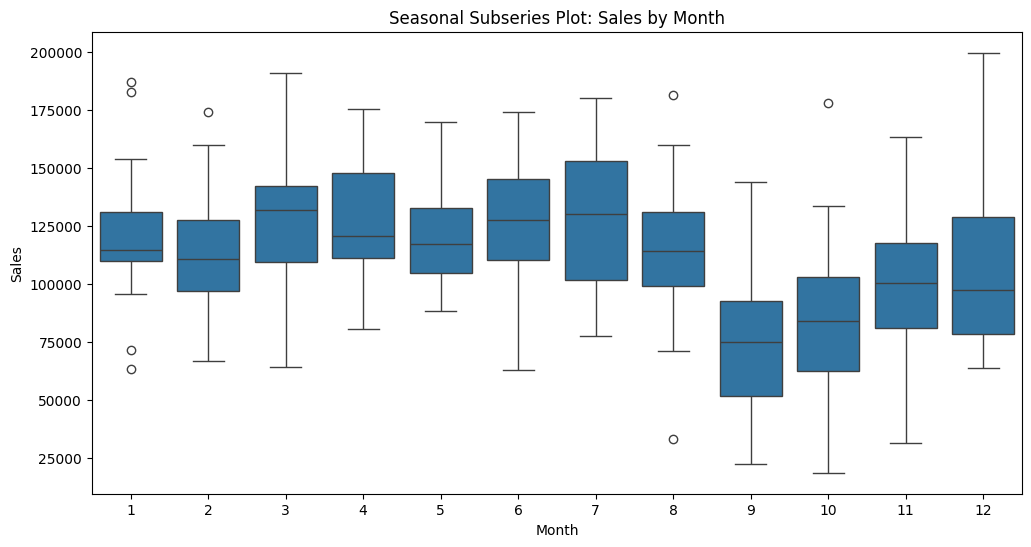

In [21]:
# Extract month and year for seasonal subseries plot
data["Month"] = data.index.month
plt.figure(figsize=(12, 6))
sb.boxplot(x="Month", y="Monthly Sales", data=data)
plt.title("Seasonal Subseries Plot: Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

- Peak Sales: Higher sales observed from March to July and in December (likely due to promotions and holidays).
- Low Sales: Significant dip in September and October, suggesting seasonal downturns.
- Variability: High fluctuations in March, June, and December, while September and October remain consistently low.

### 3. Sales variation by Category and Platform

C:\Users\kaoth\AppData\Local\Temp\ipykernel_7732\3213628800.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_category_platform = data.groupby(['Category', 'Platform'])['Monthly Sales'].sum().unstack()


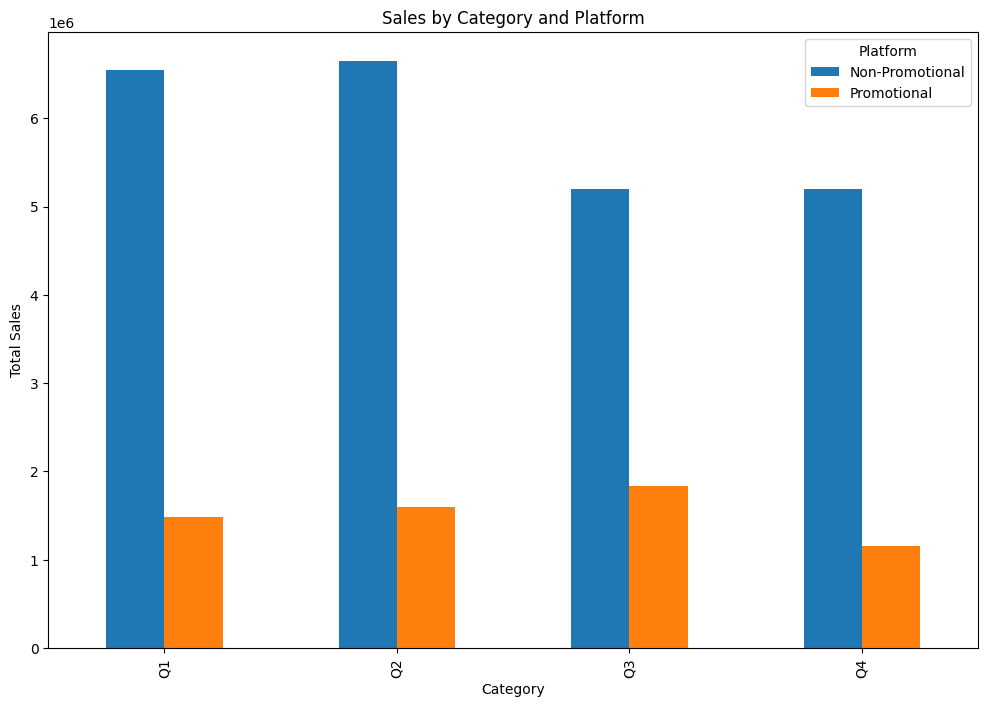

In [23]:
# Create 'Category' based on 'MonthNum'
data['Category'] = pd.cut(data['MonthNum'], bins=[0, 3, 6, 9, 12], labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Create 'Platform' based on 'Promotion'
data['Platform'] = data['Promotion'].map({1: 'Promotional', 0: 'Non-Promotional'})

# Group by Category and Platform and calculate total sales
sales_by_category_platform = data.groupby(['Category', 'Platform'])['Monthly Sales'].sum().unstack()

# Bar chart to compare sales across categories and platforms
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bar chart
sales_by_category_platform.plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_title('Sales by Category and Platform')
ax.set_xlabel('Category')
ax.set_ylabel('Total Sales')
ax.legend(title='Platform')

# Show the plot
plt.show()


C:\Users\kaoth\AppData\Local\Temp\ipykernel_7732\3045502209.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_category_platform = data.groupby(['Category', 'Platform'])['Monthly Sales'].sum().unstack()


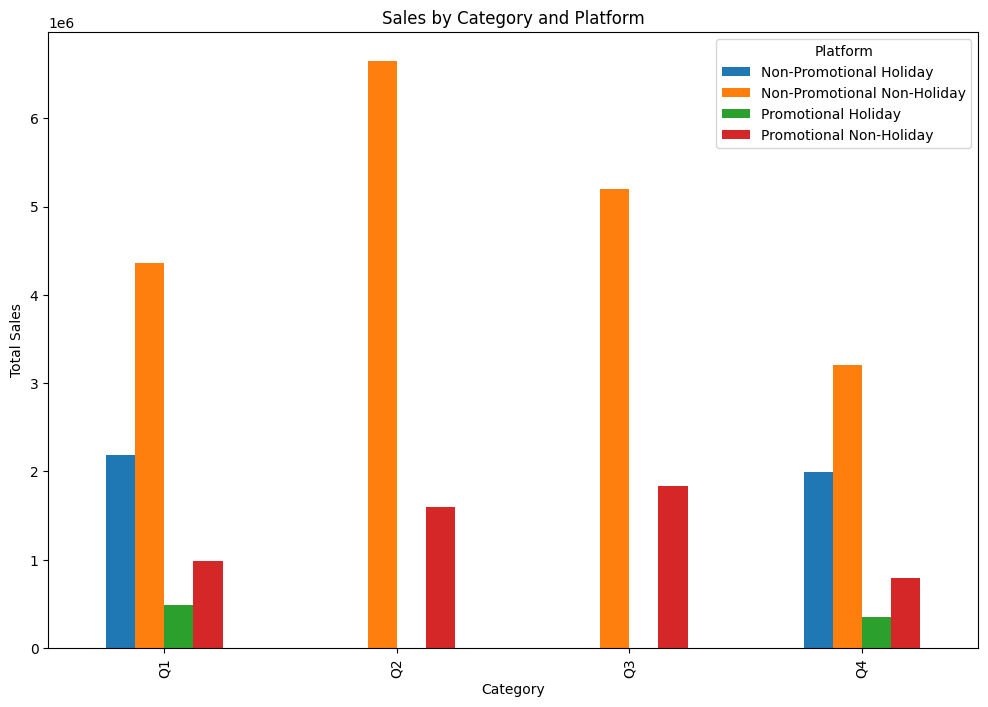

In [24]:
# Create Platform based on both 'Promotion' and 'Holiday'
data['Platform'] = data.apply(
    lambda row: 'Promotional Holiday' if row['Promotion'] == 1 and row['Holiday'] == 1 else
                ('Promotional Non-Holiday' if row['Promotion'] == 1 and row['Holiday'] == 0 else
                 ('Non-Promotional Holiday' if row['Promotion'] == 0 and row['Holiday'] == 1 else
                  'Non-Promotional Non-Holiday')),
    axis=1
)

# Group by Category and Platform and calculate total sales
sales_by_category_platform = data.groupby(['Category', 'Platform'])['Monthly Sales'].sum().unstack()

# Bar chart to compare sales across categories and platforms
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bar chart
sales_by_category_platform.plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_title('Sales by Category and Platform')
ax.set_xlabel('Category')
ax.set_ylabel('Total Sales')
ax.legend(title='Platform')

# Show the plot
plt.show()

- Highest Sales: Non-Promotional Non-Holiday category consistently dominates across all quarters, especially in Q2 and Q3.
- Promotional non-holiday sales are significantly higher than promotional holiday sales, indicating promotions work better outside holidays.
- Promotional holiday sales are the lowest across all categories.
- Q2 shows peak sales overall, suggesting strong consumer activity.

### 4. Holiday and Promotion as related to changes in salesm

In [25]:
# Compare average sales on holidays vs. non-holidays
holiday_sales = data[data['Holiday'] == 1]['Monthly Sales'].mean()
non_holiday_sales = data[data['Holiday'] == 0]['Monthly Sales'].mean()

print(f"Average Sales on Holidays: {holiday_sales}")
print(f"Average Sales on Non-Holidays: {non_holiday_sales}")


Average Sales on Holidays: 114194.52272727272
Average Sales on Non-Holidays: 111878.35454545454


The sales on holidays are slightly higher compared to non-holidays, but the difference is small. This suggests that while holidays do have some impact on sales, the increase is not very significant

In [26]:
# Compare average sales with and without promotions
promo_sales = data[data['Promotion'] == 1]['Monthly Sales'].mean()
non_promo_sales = data[data['Promotion'] == 0]['Monthly Sales'].mean()

print(f"Average Sales During Promotions: {promo_sales}")
print(f"Average Sales Without Promotions: {non_promo_sales}")


Average Sales During Promotions: 112177.5
Average Sales Without Promotions: 112286.72380952381


The difference in sales during promotions versus without promotions is minimal. This suggests that the promotions might not be having a significant impact on increasing sale. In fact, sales during non-promotional periods are slightly higher than during promotions.

In [27]:
import scipy.stats as stats

# Extract sales data for promotions and non-promotions
promo_sales_data = data[data['Promotion'] == 1]['Monthly Sales']
non_promo_sales_data = data[data['Promotion'] == 0]['Monthly Sales']

# Perform an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(promo_sales_data, non_promo_sales_data)

# Output the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level of 5%
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sales during promotions and non-promotions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in sales during promotions and non-promotions.")


T-statistic: -0.0206
P-value: 0.9836
Fail to reject the null hypothesis: There is no significant difference in sales during promotions and non-promotions.


The p-value (0.9836) is much higher than the significance level of 0.05, which means we fail to reject the null hypothesis
Promotions, in this case, do not appear to significantly impact sales based on the data available. This suggests that the current promotional strategies might not be effectively driving higher sales.

C:\Users\kaoth\AppData\Local\Temp\ipykernel_7732\3119932222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Holiday', y='Monthly Sales', data=data, palette='Set2')


Text(0.5, 0, 'Holiday Period')

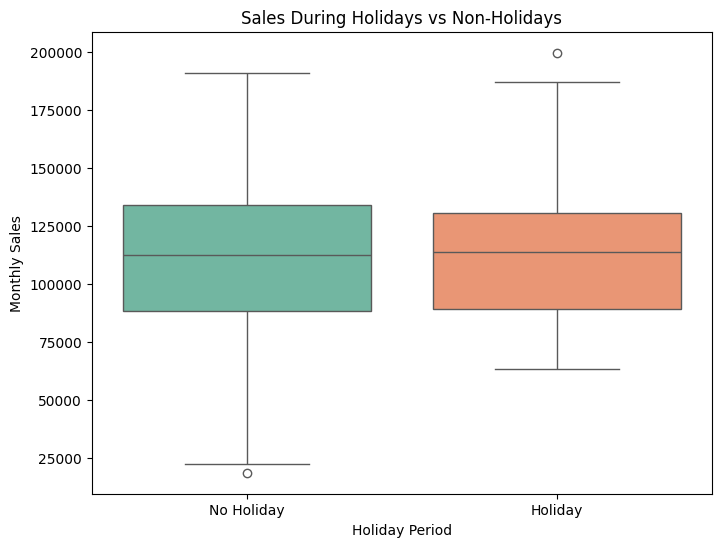

In [28]:

# Boxplot of sales during holidays vs non-holidays
plt.figure(figsize=(8, 6))
sb.boxplot(x='Holiday', y='Monthly Sales', data=data, palette='Set2')

# Adding title and adjusting labels
plt.title('Sales During Holidays vs Non-Holidays')
plt.xticks([0, 1], ["No Holiday", "Holiday"])
plt.ylabel('Monthly Sales')
plt.xlabel('Holiday Period')



C:\Users\kaoth\AppData\Local\Temp\ipykernel_7732\2893428354.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Promotion', y='Monthly Sales', data=data, palette='Set2')


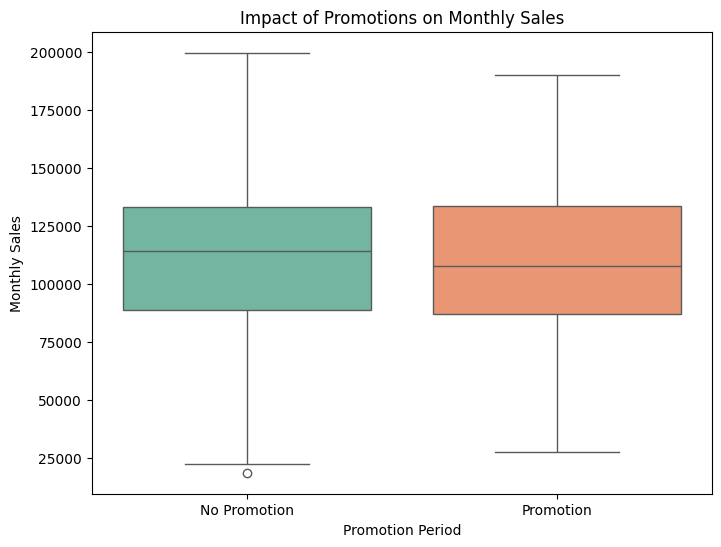

In [29]:
# Create boxplot comparing sales during promotions vs non-promotions
plt.figure(figsize=(8, 6))  # Optional, for better size control
sb.boxplot(x='Promotion', y='Monthly Sales', data=data, palette='Set2')

# Set the title and customize labels
plt.title("Impact of Promotions on Monthly Sales")
plt.xticks([0, 1], ["No Promotion", "Promotion"])
plt.xlabel('Promotion Period')
plt.ylabel('Monthly Sales')

# Display the plot
plt.show()

In [30]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['Holiday'], data['Promotion'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test p-value: {p}")

Chi-Square Test p-value: 0.5391363112315126


Since p > 0.05, we fail to reject the null hypothesis, meaning:
- There is no significant association between holidays and promotions.
- Promotions do not appear to be scheduled more frequently during holidays than on non-holiday periods.

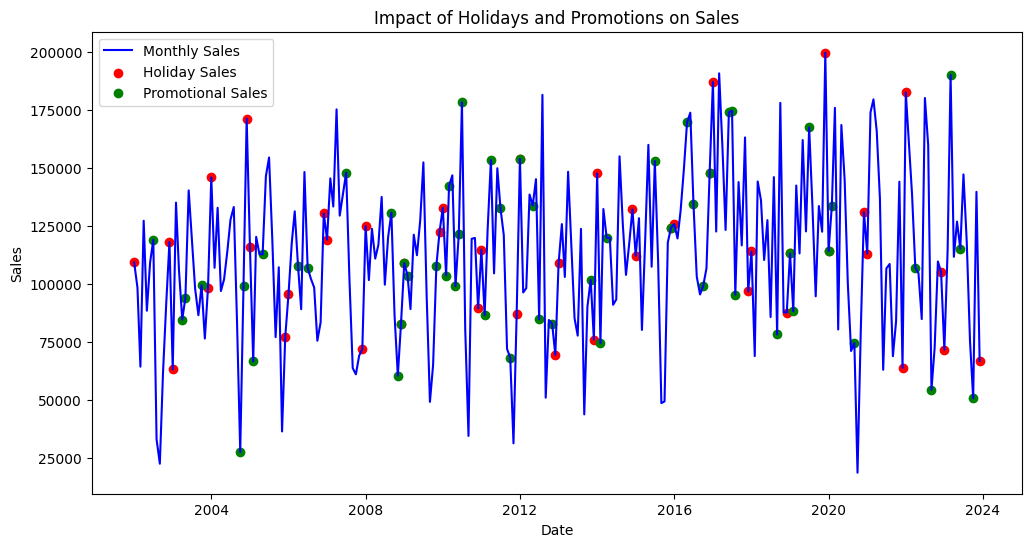

In [31]:
import matplotlib.pyplot as plt

# Plot sales over time, highlighting holidays and promotions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Monthly Sales'], label='Monthly Sales', color='blue')

# Highlight Holidays
plt.scatter(data.index[data['Holiday'] == 1], data['Monthly Sales'][data['Holiday'] == 1], color='red', label='Holiday Sales')

# Highlight Promotions
plt.scatter(data.index[data['Promotion'] == 1], data['Monthly Sales'][data['Promotion'] == 1], color='green', label='Promotional Sales')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Impact of Holidays and Promotions on Sales')
plt.legend()
plt.show()


In [37]:
from scipy.stats import ttest_ind

# Compare average sales on holidays vs. non-holidays
holiday_sales = data[data['Holiday'] == 1]['Monthly Sales']
non_holiday_sales = data[data['Holiday'] == 0]['Monthly Sales']

t_stat_holiday, p_value_holiday = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

# Compare average sales during promotions vs. non-promotions
promo_sales = data[data['Promotion'] == 1]['Monthly Sales']
non_promo_sales = data[data['Promotion'] == 0]['Monthly Sales']

t_stat_promo, p_value_promo = ttest_ind(promo_sales, non_promo_sales, equal_var=False)

# Print results
print(f"T-Test for Holidays: T-statistic = {t_stat_holiday:.4f}, P-value = {p_value_holiday:.4f}")
print(f"T-Test for Promotions: T-statistic = {t_stat_promo:.4f}, P-value = {p_value_promo:.4f}")

# Interpretation:
alpha = 0.05
if p_value_holiday < alpha:
    print("Holidays have a significant impact on sales.")
else:
    print("Holidays do NOT have a significant impact on sales.")

if p_value_promo < alpha:
    print("Promotions have a significant impact on sales.")
else:
    print("Promotions do NOT have a significant impact on sales.")


T-Test for Holidays: T-statistic = 0.4195, P-value = 0.6762
T-Test for Promotions: T-statistic = -0.0203, P-value = 0.9839
Holidays do NOT have a significant impact on sales.
Promotions do NOT have a significant impact on sales.


In [32]:
print(data.columns)

Index(['Monthly Sales', 'Year', 'MonthNum', 'Quarter', 'DayOfWeek', 'Holiday',
       'Promotion', 'Month', 'Category', 'Platform'],
      dtype='object')


### Understanding seasonality by grouping sales  month and year to understand pattern

In [33]:
# Group by 'MonthNum' and calculate the average sales per month
monthly_avg_sales = data.groupby("MonthNum")["Monthly Sales"].mean()

# Display the results
print(monthly_avg_sales)


MonthNum
1     121589.681818
2     112379.863636
3     130637.727273
4     126649.272727
5     121938.636364
6     125856.590909
7     129295.909091
8     114115.000000
9      75980.045455
10     84202.045455
11     97728.454545
12    106799.363636
Name: Monthly Sales, dtype: float64


C:\Users\kaoth\AppData\Local\Temp\ipykernel_7732\196211693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=monthly_avg_sales.index, y=monthly_avg_sales.values, palette="Blues_r")


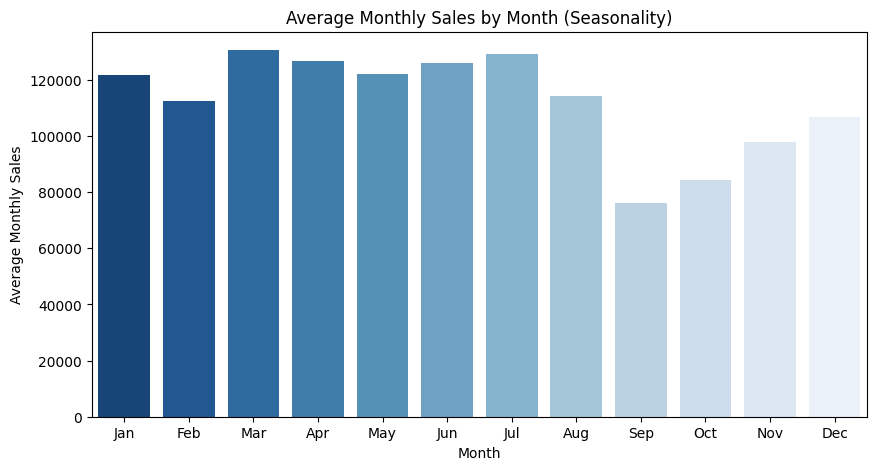

In [34]:
plt.figure(figsize=(10, 5))
sb.barplot(x=monthly_avg_sales.index, y=monthly_avg_sales.values, palette="Blues_r")
plt.xlabel("Month")
plt.ylabel("Average Monthly Sales")
plt.title("Average Monthly Sales by Month (Seasonality)")
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

The bar chart reveals seasonal sales variations across months. Certain months experience higher sales, possibly due to holidays or promotions

### 5. Analysing the impact of holidays and promotions on sales

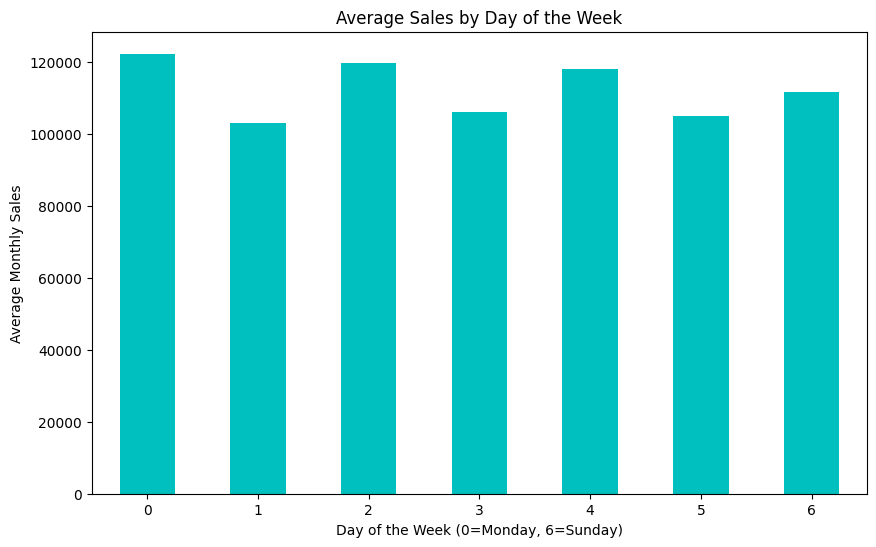

In [35]:
# Reset index so 'Date' is available as a column again
data.reset_index(inplace=True)

# Add a 'DayOfWeek' column based on the 'Date' (0=Monday, 6=Sunday)
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Group by day of the week and calculate the average sales for each day
sales_by_day = data.groupby('DayOfWeek')['Monthly Sales'].mean()

# Plotting the sales by day of the week
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='c')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Monthly Sales')
plt.xticks(rotation=0)
plt.show()



- Monday and Thursday are the strongest sales days, meaning businesses could leverage targeted promotions or special deals on these days.
- Sales dip mid-week (Wednesday) and toward the weekend (Friday-Saturday), suggesting a potential opportunity to boost engagement with offers or campaigns.
- Sunday sales remain steady, which could be attributed to relaxed shopping habits or increased online shopping.

Recommendations:
- Optimize Q2 & Q3 marketing as these quarters show the highest demand.
- Avoid over-reliance on holiday promotions, as organic sales are already strong.
- Reassess promotional strategies in Q4 to counteract seasonal dips.